# pm2.5 training notebook

In [1]:
import json
import datetime as dt
import pytz
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, model_selection
from scipy import stats

## Functions that get data from server to us

In [2]:
def get_data_by_pos(pos):
    r = requests.get(f'http://140.116.82.93:6800/campus/display/{ pos }')
    # date field in self.data is the str of datetime
    # We need to convert it to timezone aware object first
    data = json.loads(r.text)
    for index, value in enumerate(data):
      # strptime() parse str of date according to the format given behind
      # It is still naive datetime object, meaning that it is unaware of timezone
      unaware = dt.datetime.strptime(value.get('date'),  '%a, %d %b %Y %H:%M:%S %Z')
      # Create a utc timezone
      utc_timezone = pytz.timezone('UTC')
      # make utc_unaware obj aware of timezone
      # Convert the given time directly to literally the same time with different timezone
      # For example: Change from 2019-05-19 07:41:13(unaware) to 2019-05-19 07:41:13+00:00(aware, tzinfo=UTC)
      utc_aware = utc_timezone.localize(unaware)
      # This can also do the same thing
      # Replace the tzinfo of an unaware datetime object to a given tzinfo
      # utc_aware = unaware.replace(tzinfo=pytz.utc)

      # Transform utc timezone to +8 GMT timezone
      # Convert the given time to the same moment of time just like performing timezone calculation
      # For example: Change from 2019-05-19 07:41:13+00:00(aware, tzinfo=UTC) to 2019-05-19 15:41:13+08:00(aware, tzinfo=Asiz/Taipei)
      taiwan_aware = utc_aware.astimezone(pytz.timezone('Asia/Taipei'))
      # print(f"{ index }: {unaware} {utc_aware} {taiwan_aware}")
      value['date'] = taiwan_aware
    return data

In [3]:
def get_all_data():
    r = requests.get(f'http://140.116.82.93:6800/training')
    # date field in self.data is the str of datetime
    # We need to convert it to timezone aware object first
    data = json.loads(r.text)
    for index, value in enumerate(data):
      # strptime() parse str of date according to the format given behind
      # It is still naive datetime object, meaning that it is unaware of timezone
      unaware = dt.datetime.strptime(value.get('date'),  '%a, %d %b %Y %H:%M:%S %Z')
      # Create a utc timezone
      utc_timezone = pytz.timezone('UTC')
      # make utc_unaware obj aware of timezone
      # Convert the given time directly to literally the same time with different timezone
      # For example: Change from 2019-05-19 07:41:13(unaware) to 2019-05-19 07:41:13+00:00(aware, tzinfo=UTC)
      utc_aware = utc_timezone.localize(unaware)
      # This can also do the same thing
      # Replace the tzinfo of an unaware datetime object to a given tzinfo
      # utc_aware = unaware.replace(tzinfo=pytz.utc)

      # Transform utc timezone to +8 GMT timezone
      # Convert the given time to the same moment of time just like performing timezone calculation
      # For example: Change from 2019-05-19 07:41:13+00:00(aware, tzinfo=UTC) to 2019-05-19 15:41:13+08:00(aware, tzinfo=Asiz/Taipei)
      taiwan_aware = utc_aware.astimezone(pytz.timezone('Asia/Taipei'))
      # print(f"{ index }: {unaware} {utc_aware} {taiwan_aware}")
      value['date'] = taiwan_aware
    return data

## ÁâπÂÆö‰∏ÄÂÄã position ÁöÑ Linear Regression

Êö´ÂÆöÁöÑÂÅöÊ≥ïÊòØÔºöÂ∞áÊØè‰∏ÄÂ∞èÊôÇÁöÑË≥áÊñôÂÅöÂπ≥ÂùáÔºåÁÑ∂ÂæåÂ∞á‰∏ã‰∏ÄÂ∞èÊôÇÁöÑ pm2.5 Âπ≥ÂùáÁï∂‰ΩúÊÉ≥Ë¶ÅÈ†êÊ∏¨ÁöÑ y„ÄÇÂ¶ÇÊûú‰∏ã‰∏ÄÂ∞èÊôÇÁöÑ pm2.5 Âπ≥ÂùáÁÑ°Ê≥ïÂèñÂæó(Ë≥áÊñôÁº∫Â§±)ÔºåÂâáÂ∞áË©≤ row Êç®Ê£Ñ„ÄÇÊãø‰æÜË®ìÁ∑¥ÁöÑ columns ÁõÆÂâçÊúâ 'month', 'day', 'weekday', 'hour', 'pm1.0', 'pm2.5', 'pm10.0', 'temp', 'humidity'„ÄÇ

### Load data


In [4]:
data3 = get_data_by_pos(0)

In [5]:
df3 = pd.DataFrame(data3)

In [6]:
df3.head()

date  humidity  pm10  pm100  pm25  temp
0 2019-05-17 17:05:40+08:00        76    14     31    14    26
1 2019-05-17 17:20:39+08:00        69    10     13    13    28
2 2019-05-17 17:35:38+08:00        68    13     19    18    28
3 2019-05-17 17:50:37+08:00        67    10     14    14    28
4 2019-05-17 18:05:35+08:00        67    12     16    16    28

### Data preprocessing

In [7]:
# Input time
time = ['2019 05 11', '2019 08 06']
taipei_tz = pytz.timezone('Asia/Taipei')
# Set time
start_time = dt.datetime.strptime(time[0], '%Y %m %d').replace(tzinfo=taipei_tz)
end_time = dt.datetime.strptime(time[1], '%Y %m %d').replace(tzinfo=taipei_tz)
# Select the duration
# df3 = df3.loc[ df3['date'] >= start_time ]
# df3 = df3.loc[ df3['date'] <= end_time ]

In [8]:
# Rename the names of columns
df3 = df3.rename(columns = {'pm10': 'pm1.0', 'pm25': 'pm2.5', 'pm100': 'pm10.0'})

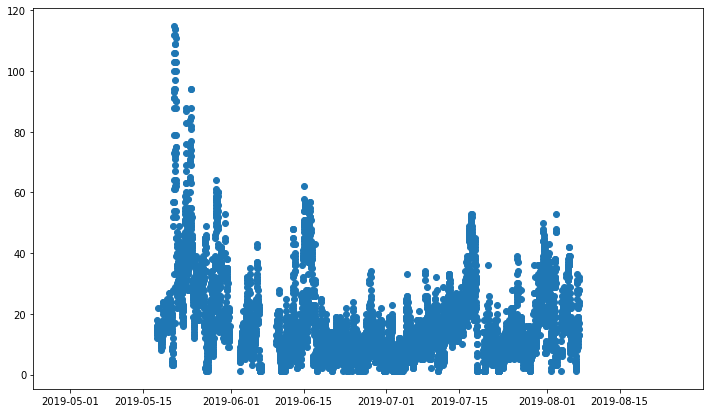

In [9]:
# Add explicitly converter
pd.plotting.register_matplotlib_converters()
# Plt
plt.figure(figsize=(12, 7))
plt.scatter(df3['date'], df3['pm2.5'])

In [10]:
# Exclude outliers
# want_cols = ['humidity', 'pm1.0', 'pm10.0', 'pm2.5', 'temp']
# df3 = df3[(np.abs(stats.zscore(df3.loc[:, want_cols])) < 7).all(axis=1)]
df3 = df3.loc[ df3['pm2.5'] < 120 ]

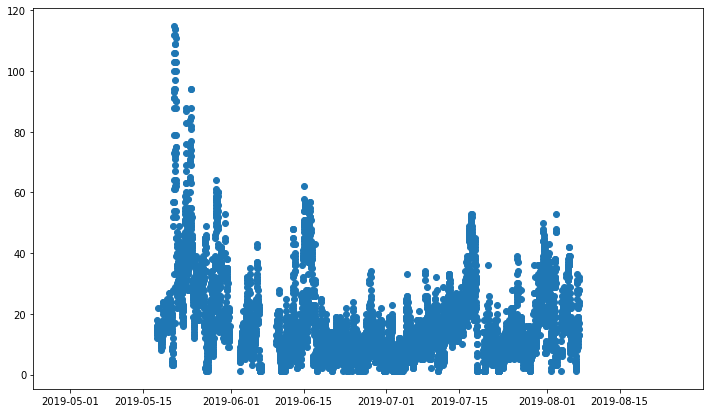

In [11]:
# Add explicitly converter
pd.plotting.register_matplotlib_converters()
# Plt
plt.figure(figsize=(12, 7))
plt.scatter(df3['date'], df3['pm2.5'])

In [12]:
# Split time infomation from column `date`
df3['month'] = df3['date'].apply(lambda x: x.month)
df3['day'] = df3['date'].apply(lambda x: x.day)
df3['weekday'] = df3['date'].apply(lambda x: x.weekday)
df3['hour'] = df3['date'].apply(lambda x: x.hour)
df3['hour_minute'] = df3['date'].apply(lambda x: x.hour+x.minute/60)

In [13]:
# Set the order of the columns & discard some columns
df3 = df3[['month', 'day', 'weekday', 'hour', 'hour_minute', 'pm1.0', 'pm2.5', 'pm10.0', 'temp', 'humidity']]

In [14]:
df3.head()

month  day  weekday  hour  hour_minute  pm1.0  pm2.5  pm10.0  temp  \
0      5   17        4    17    17.083333     14     14      31    26   
1      5   17        4    17    17.333333     10     13      13    28   
2      5   17        4    17    17.583333     13     18      19    28   
3      5   17        4    17    17.833333     10     14      14    28   
4      5   17        4    18    18.083333     12     16      16    28   

   humidity  
0        76  
1        69  
2        68  
3        67  
4        67

In [15]:
# Evaluate mean values for each hour
df3mean = df3.groupby(['month', 'day', 'hour']).mean()

In [16]:
df3mean.head(10)

weekday  hour_minute  pm1.0  pm2.5  pm10.0  temp  humidity
month day hour                                                            
5     17  17        4.0    17.458333  11.75  14.75   19.25  27.5     70.00
          18        4.0    18.458333  11.25  15.50   15.50  28.0     68.00
          19        4.0    19.458333  10.50  13.75   14.00  27.0     69.75
          20        4.0    20.458333  10.50  13.50   13.75  27.0     69.00
          21        4.0    21.458333  11.00  14.25   14.25  27.0     69.25
          22        4.0    22.458333  11.50  15.00   15.25  27.0     71.00
          23        4.0    23.458333  11.00  15.25   15.50  27.0     72.50
      18  0         5.0     0.458333  12.00  16.75   16.75  26.0     75.25
          1         5.0     1.450000  12.25  15.25   15.25  26.0     75.50
          2         5.0     2.441667  11.50  16.00   17.00  26.0     79.00

In [17]:
df3mean.reset_index(inplace=True)

In [18]:
df3mean.head()

month  day  hour  weekday  hour_minute  pm1.0  pm2.5  pm10.0  temp  \
0      5   17    17      4.0    17.458333  11.75  14.75   19.25  27.5   
1      5   17    18      4.0    18.458333  11.25  15.50   15.50  28.0   
2      5   17    19      4.0    19.458333  10.50  13.75   14.00  27.0   
3      5   17    20      4.0    20.458333  10.50  13.50   13.75  27.0   
4      5   17    21      4.0    21.458333  11.00  14.25   14.25  27.0   

   humidity  
0     70.00  
1     68.00  
2     69.75  
3     69.00  
4     69.25

In [19]:
# Reconstruct time infomation by `month`, `day`, and `hour`

def get_time(x):
    time_str = '2019 %d %d %d' % (x[0], x[1], x[2])
    taipei_tz = pytz.timezone('Asia/Taipei')
    time = dt.datetime.strptime(time_str, '%Y %m %d %H').replace(tzinfo=taipei_tz)
    return time

df3mean['time'] = df3mean[['month', 'day', 'hour']].apply(get_time, axis=1)

In [20]:
df3mean.head()

month  day  hour  weekday  hour_minute  pm1.0  pm2.5  pm10.0  temp  \
0      5   17    17      4.0    17.458333  11.75  14.75   19.25  27.5   
1      5   17    18      4.0    18.458333  11.25  15.50   15.50  28.0   
2      5   17    19      4.0    19.458333  10.50  13.75   14.00  27.0   
3      5   17    20      4.0    20.458333  10.50  13.50   13.75  27.0   
4      5   17    21      4.0    21.458333  11.00  14.25   14.25  27.0   

   humidity                      time  
0     70.00 2019-05-17 16:54:00+08:00  
1     68.00 2019-05-17 17:54:00+08:00  
2     69.75 2019-05-17 18:54:00+08:00  
3     69.00 2019-05-17 19:54:00+08:00  
4     69.25 2019-05-17 20:54:00+08:00

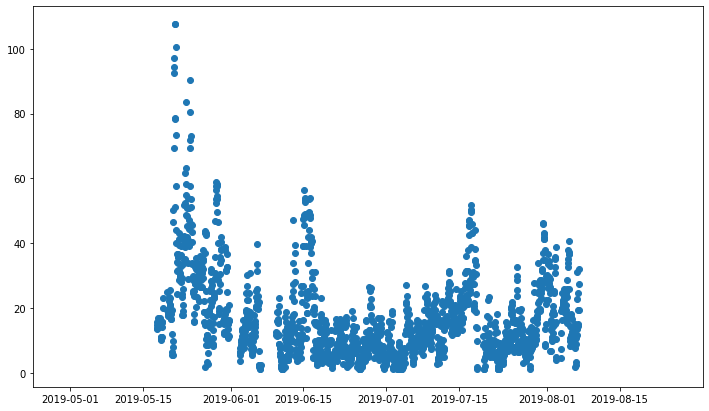

In [21]:
# Add explicitly converter
pd.plotting.register_matplotlib_converters()
# Plt
plt.figure(figsize=(12, 7))
plt.scatter(df3mean['time'], df3mean['pm2.5'])

In [22]:
# Shift columns
df3mean[['pm2.5_shift-1']] = df3mean[['pm2.5']].shift(-1)
df3mean[['time_shift-1']] = df3mean[['time']].shift(-1)

In [23]:
df3mean.head()

month  day  hour  weekday  hour_minute  pm1.0  pm2.5  pm10.0  temp  \
0      5   17    17      4.0    17.458333  11.75  14.75   19.25  27.5   
1      5   17    18      4.0    18.458333  11.25  15.50   15.50  28.0   
2      5   17    19      4.0    19.458333  10.50  13.75   14.00  27.0   
3      5   17    20      4.0    20.458333  10.50  13.50   13.75  27.0   
4      5   17    21      4.0    21.458333  11.00  14.25   14.25  27.0   

   humidity                      time  pm2.5_shift-1              time_shift-1  
0     70.00 2019-05-17 16:54:00+08:00          15.50 2019-05-17 17:54:00+08:00  
1     68.00 2019-05-17 17:54:00+08:00          13.75 2019-05-17 18:54:00+08:00  
2     69.75 2019-05-17 18:54:00+08:00          13.50 2019-05-17 19:54:00+08:00  
3     69.00 2019-05-17 19:54:00+08:00          14.25 2019-05-17 20:54:00+08:00  
4     69.25 2019-05-17 20:54:00+08:00          15.00 2019-05-17 21:54:00+08:00

In [24]:
# check the next row is the next hour or not. 
# If it is not, the `pm2.5_next_hour` column will be given NaN.

def check_next_hour(x):
    one_hour = dt.timedelta(hours=1)
    if x[2] - x[1] == one_hour:
        return x[0]
    return np.nan

df3mean['pm2.5_next_hour'] = df3mean[['pm2.5_shift-1', 'time', 'time_shift-1']].apply(check_next_hour, axis=1)

In [25]:
df3mean.head()

month  day  hour  weekday  hour_minute  pm1.0  pm2.5  pm10.0  temp  \
0      5   17    17      4.0    17.458333  11.75  14.75   19.25  27.5   
1      5   17    18      4.0    18.458333  11.25  15.50   15.50  28.0   
2      5   17    19      4.0    19.458333  10.50  13.75   14.00  27.0   
3      5   17    20      4.0    20.458333  10.50  13.50   13.75  27.0   
4      5   17    21      4.0    21.458333  11.00  14.25   14.25  27.0   

   humidity                      time  pm2.5_shift-1  \
0     70.00 2019-05-17 16:54:00+08:00          15.50   
1     68.00 2019-05-17 17:54:00+08:00          13.75   
2     69.75 2019-05-17 18:54:00+08:00          13.50   
3     69.00 2019-05-17 19:54:00+08:00          14.25   
4     69.25 2019-05-17 20:54:00+08:00          15.00   

               time_shift-1  pm2.5_next_hour  
0 2019-05-17 17:54:00+08:00            15.50  
1 2019-05-17 18:54:00+08:00            13.75  
2 2019-05-17 19:54:00+08:00            13.50  
3 2019-05-17 20:54:00+08:00            14.25  
4 2019-05-17 21:54:00+08:00            15.00

In [26]:
df3mean.isna().sum()

month               0
day                 0
hour                0
weekday             0
hour_minute         0
pm1.0               0
pm2.5               0
pm10.0              0
temp                0
humidity            0
time                0
pm2.5_shift-1       1
time_shift-1        1
pm2.5_next_hour    10
dtype: int64

In [27]:
# Discard rows that contain NaN value
df3mean.dropna(inplace=True)

In [28]:
df3mean.isna().sum()

month              0
day                0
hour               0
weekday            0
hour_minute        0
pm1.0              0
pm2.5              0
pm10.0             0
temp               0
humidity           0
time               0
pm2.5_shift-1      0
time_shift-1       0
pm2.5_next_hour    0
dtype: int64

### Normalization

$z = \frac{x- \mu}{\sigma}$


In [29]:
# Save time infomation in another df, and discard it
df3mean_time_shift = df3mean['time_shift-1']
df3mean.drop(columns=['time', 'time_shift-1'], axis=0, inplace=True)
# Save mean and std
mean_all = df3mean.mean()
std_all = df3mean.std()
# Normalization
df3mean = (df3mean - df3mean.mean()) / df3mean.std()

### Divid training set and test set

In [30]:
four_fifth_len = len(df3mean)*0.8
four_fifth_len = int(four_fifth_len)

In [31]:
train_df = df3mean[:four_fifth_len]
test_df = df3mean[four_fifth_len:]

In [32]:
train_df_time_shift = df3mean_time_shift[:four_fifth_len]
test_df_time_shift = df3mean_time_shift[four_fifth_len:]

In [33]:
X = train_df[['month', 'day', 'weekday', 'hour_minute', 'pm1.0', 'pm2.5', 'pm10.0', 'temp', 'humidity']]
y = train_df[['pm2.5_next_hour']]

In [34]:
test_X = test_df[['month', 'day', 'weekday', 'hour_minute', 'pm1.0', 'pm2.5', 'pm10.0', 'temp', 'humidity']]
test_y = test_df[['pm2.5_next_hour']]

### Fit the model

using `sklearn.linear_model.LinearRegression`

In [35]:
# Fit the model
model = linear_model.LinearRegression(normalize=True)
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [36]:
# See the coefficients of our model
a = model.coef_
b = model.intercept_
print(a)
print(b)

[[-2.24461557e-02 -3.54610576e-03 -5.79064498e-04  2.74379268e-02
   1.40362232e-01  6.08824748e-01  1.73462870e-01 -8.60239732e-02
  -5.53644968e-02]]
[-0.00961318]


In [37]:
for i in range(len(X.columns)):
    print('Coefficient for %10s:\t%s' % (X.columns[i], model.coef_[0][i]))

Coefficient for      month:	-0.022446155692447324
Coefficient for        day:	-0.003546105755057375
Coefficient for    weekday:	-0.0005790644979722539
Coefficient for hour_minute:	0.02743792681187112
Coefficient for      pm1.0:	0.14036223243265913
Coefficient for      pm2.5:	0.6088247479516125
Coefficient for     pm10.0:	0.17346286958078178
Coefficient for       temp:	-0.08602397319231529
Coefficient for   humidity:	-0.055364496805199274


In [38]:
# Calculate predict value
predict_train_y = model.predict(X)
predict_y = model.predict(test_X)
# Calculate mean squared error for training set & test set
train_mse = metrics.mean_squared_error(y, predict_train_y)
test_mse = metrics.mean_squared_error(test_y, predict_y)

print('Train MSE:\t %s' % train_mse)
print('Test MSE:\t %s' % test_mse)

Train MSE:	 0.1390375200615582
Test MSE:	 0.10949888015740035


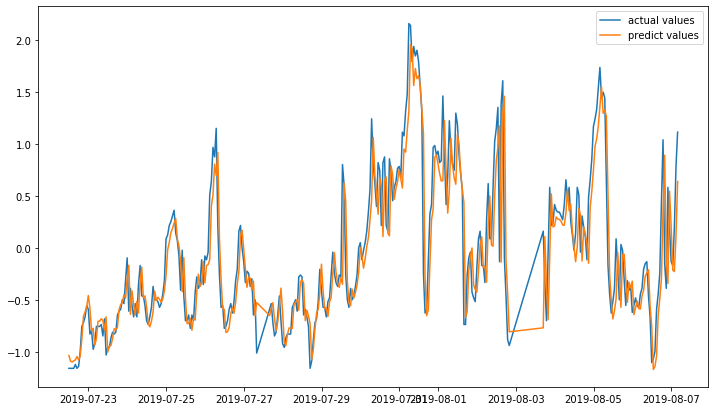

In [39]:
# Add explicitly converter
pd.plotting.register_matplotlib_converters()
# Plt
plt.figure(figsize=(12, 7))
plt.plot(test_df_time_shift, test_y, label='actual values')
plt.plot(test_df_time_shift, predict_y, label='predict values')
plt.legend()
plt.show()

### Feature Selection via Ridge Regression

~~Our test error is worse than our training error. Therefore, our next job is to improve this.~~

Next, we improve mean squared error. 

We use the class `sklearn.linear_model.Ridge`. We will throw all features in, let ridge regression do selection, and see how our own feature sets compare. Notice we have an additional hyperparameter,  ùõº . This controls how heavy the penalty is for larger weights.

To perform hyperparameter tuning we can use a technique called **cross validation**. We take our test set, randomly divide into  ùëò  training and testing sets. Differnent samples will be randomly placed in each set, each with their own variance. We then average the results over the folds to estimate how well we will do on unseen test data. After splitting the data into  ùëò  folds (10 is a usual choice for  ùëò ), we will try out different hyperparameter values and select the best one. Much of this process is already wrapped in `sklearn.model_selection.cross_val_score` for us. We just need to define a scoring function.


In [40]:
# Define a scoring function
def scorer(model, X, y):
    preds = model.predict(X)
    return metrics.mean_squared_error(y, preds)

In [41]:
# Define a range of values for alpha to search over.
alphas = np.linspace(start=0, stop=0.03, num=11)

mses = []
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha, normalize=True)
    mse = model_selection.cross_val_score(ridge, X, y, cv=10, scoring=scorer)
    mses.append(mse.mean())

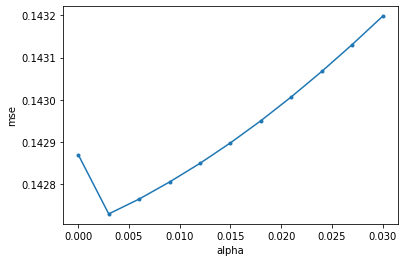

In [42]:
plt.plot(alphas, mses, marker='.')
plt.xlabel('alpha')
plt.ylabel('mse')
plt.show()

In [43]:
best_alpha = alphas[np.argmin(mses)]
best_alpha

0.003

In [44]:
# Use `best_alpha` to fit the model
ridge = linear_model.Ridge(alpha=best_alpha, normalize=True)
ridge.fit(X, y)

Ridge(alpha=0.003, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [45]:
# See the coefficients of our model
for i in range(len(X.columns)):
    print('Coefficient for %10s:\t%s' % (X.columns[i], ridge.coef_[0][i]))

Coefficient for      month:	-0.024812101868136337
Coefficient for        day:	-0.004220363199308246
Coefficient for    weekday:	-0.0005965837157986628
Coefficient for hour_minute:	0.02638953961352147
Coefficient for      pm1.0:	0.22280591288729007
Coefficient for      pm2.5:	0.41332136634120487
Coefficient for     pm10.0:	0.2870197355670882
Coefficient for       temp:	-0.08552066548603347
Coefficient for   humidity:	-0.05286416139025391


In [46]:
# Calculate mean squared error for training set & test set
predict_train_y = ridge.predict(X)
predict_y = ridge.predict(test_X)
# Calculate mean squared error for training set & test set
train_mse = metrics.mean_squared_error(y, predict_train_y)
test_mse = metrics.mean_squared_error(test_y, predict_y)

print('Train MSE:\t %s' % train_mse)
print('Test MSE:\t %s' % test_mse)

Train MSE:	 0.13913844595399738
Test MSE:	 0.1094267570106597


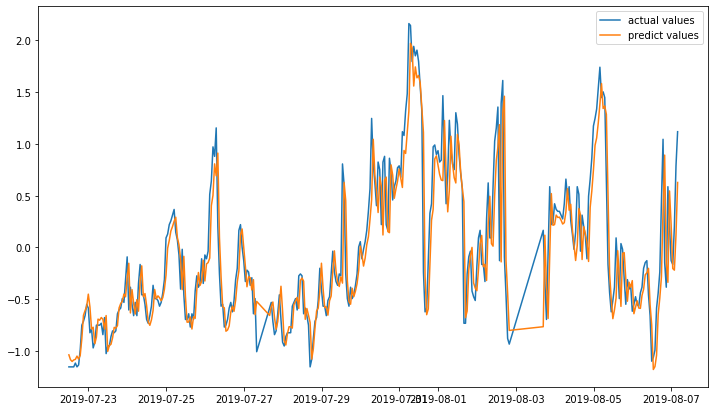

In [47]:
# Add explicitly converter
pd.plotting.register_matplotlib_converters()
# Plt
plt.figure(figsize=(12, 7))
plt.plot(test_df_time_shift, test_y, label='actual values')
plt.plot(test_df_time_shift, predict_y, label='predict values')
plt.legend()
plt.show()

### Feature Selection by myself

In [48]:
# Select features I want
X_fsm = X[['pm2.5', 'temp', 'humidity']]
test_X_fsm = test_X[['pm2.5', 'temp', 'humidity']]

In [49]:
# Fit the model
model = linear_model.LinearRegression(normalize=True)
model.fit(X_fsm, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [50]:
# See the coefficients of our model
for i in range(len(X_fsm.columns)):
    print('Coefficient for %10s:\t%s' % (X_fsm.columns[i], model.coef_[0][i]))

Coefficient for      pm2.5:	0.9205243249966436
Coefficient for       temp:	-0.08959209564168642
Coefficient for   humidity:	-0.07114057490896636


In [51]:
# Calculate predict value
predict_train_y = model.predict(X_fsm)
predict_y = model.predict(test_X_fsm)
# Calculate mean squared error for training set & test set
train_mse = metrics.mean_squared_error(y, predict_train_y)
test_mse = metrics.mean_squared_error(test_y, predict_y)

print('Train MSE:\t %s' % train_mse)
print('Test MSE:\t %s' % test_mse)

Train MSE:	 0.14029507159020022
Test MSE:	 0.10637700475744645


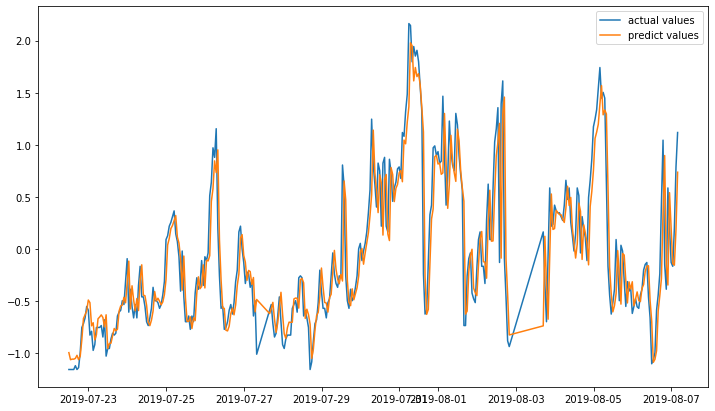

In [52]:
# Add explicitly converter
pd.plotting.register_matplotlib_converters()
# Plt
plt.figure(figsize=(12, 7))
plt.plot(test_df_time_shift, test_y, label='actual values')
plt.plot(test_df_time_shift, predict_y, label='predict values')
plt.legend()
plt.show()

In [53]:
# Transform normalized data back to original data
m = mean_all['pm2.5_next_hour']
s = std_all['pm2.5_next_hour']

test_y_ori = test_y * s + m
predict_y_ori = predict_y * s + m

y_ori = y * s + m
predict_train_y_ori = predict_train_y * s + m

In [54]:
# Calculate mean squared error for training set & test set
train_mse = metrics.mean_squared_error(y_ori, predict_train_y_ori)
test_mse = metrics.mean_squared_error(test_y_ori, predict_y_ori)

print('Train MSE:\t %s,\t sqrt: %s (Œºg/m^3)' % (train_mse, np.sqrt(train_mse)))
print('Test MSE:\t %s,\t sqrt: %s (Œºg/m^3)' % (test_mse, np.sqrt(test_mse)))

Train MSE:	 26.089747224545476,	 sqrt: 5.107812371705276 (Œºg/m^3)
Test MSE:	 19.78222850716241,	 sqrt: 4.447721720967086 (Œºg/m^3)


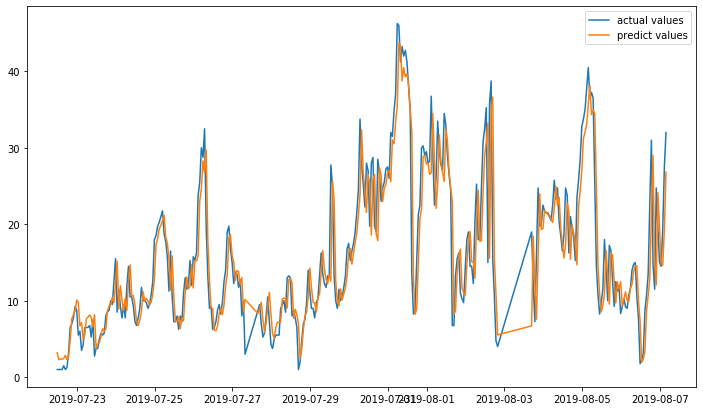

In [55]:
# Add explicitly converter
pd.plotting.register_matplotlib_converters()
# Plt
plt.figure(figsize=(12, 7))
plt.plot(test_df_time_shift, test_y_ori, label='actual values')
plt.plot(test_df_time_shift, predict_y_ori, label='predict values')
plt.legend()
plt.show()

### Predict next `N` hour 

Â∞áÊâÄÊúâÊ≠•È©üÂØ´Êàê‰∏ÄÂÄã function „ÄÇ
‰∏¶ÂòóË©¶Áî®‰∏ÄÊ®£ÁöÑÊñπÊ≥ïÈ†êÊ∏¨‰∏ã`N`ÂÄãÂ∞èÊôÇÁöÑpm2.5Âπ≥Âùá„ÄÇ


In [56]:
def predict_next_n(pos, n):    
    # Load data
    data3 = get_data_by_pos(pos)
    df3 = pd.DataFrame(data3)
    # Input time
    time = ['2019 05 11', '2019 08 06']
    taipei_tz = pytz.timezone('Asia/Taipei')
    # Set time
    start_time = dt.datetime.strptime(time[0], '%Y %m %d').replace(tzinfo=taipei_tz)
    end_time = dt.datetime.strptime(time[1], '%Y %m %d').replace(tzinfo=taipei_tz)
    # Select the duration
    # df3 = df3.loc[ df3['date'] >= start_time ]
    # df3 = df3.loc[ df3['date'] <= end_time ]
    if pos == 2:
        # Input time
        time = ['2019 06 06', '2019 08 06']
        taipei_tz = pytz.timezone('Asia/Taipei')
        # Set time
        start_time = dt.datetime.strptime(time[0], '%Y %m %d').replace(tzinfo=taipei_tz)
        end_time = dt.datetime.strptime(time[1], '%Y %m %d').replace(tzinfo=taipei_tz)
        # Select the duration
        df3 = df3.loc[ df3['date'] >= start_time ]
        # df3 = df3.loc[ df3['date'] <= end_time ]
    # Rename the names of columns
    df3 = df3.rename(columns = {'pm10': 'pm1.0', 'pm25': 'pm2.5', 'pm100': 'pm10.0'})
    # Exclude outliers
    # want_cols = ['humidity', 'pm1.0', 'pm10.0', 'pm2.5', 'temp']
    # df3 = df3[(np.abs(stats.zscore(df3.loc[:, want_cols])) < 4).all(axis=1)]
    df3 = df3.loc[ df3['pm2.5'] < 120 ]
    # Split time infomation from column `date`
    df3['month'] = df3['date'].apply(lambda x: x.month)
    df3['day'] = df3['date'].apply(lambda x: x.day)
    df3['weekday'] = df3['date'].apply(lambda x: x.weekday)
    df3['hour'] = df3['date'].apply(lambda x: x.hour)
    df3['hour_minute'] = df3['date'].apply(lambda x: x.hour+x.minute/60)
    # Set the order of the columns & discard some columns
    df3 = df3[['month', 'day', 'weekday', 'hour', 'hour_minute', 'pm1.0', 'pm2.5', 'pm10.0', 'temp', 'humidity']]
    # Evaluate mean values for each hour
    df3mean = df3.groupby(['month', 'day', 'hour']).mean()
    df3mean.reset_index(inplace=True)
    # Reconstruct time infomation by `month`, `day`, and `hour`
    df3mean['time'] = df3mean[['month', 'day', 'hour']].apply(get_time, axis=1)
    # Shift columns
    df3mean[['pm2.5_shift-1']] = df3mean[['pm2.5']].shift(-n)
    df3mean[['time_shift-1']] = df3mean[['time']].shift(-n)
    # Check the next row is the next hour or not. 
    # If it is not, the `pm2.5_next_hour` column will be given NaN.
    
    def check_next_hour(x):
        n_hour = dt.timedelta(hours=n)
        if x[2] - x[1] == n_hour:
            return x[0]
        return np.nan
    
    df3mean['pm2.5_next_hour'] = df3mean[['pm2.5_shift-1', 'time', 'time_shift-1']].apply(check_next_hour, axis=1)
    # Discard rows that contain NaN value
    df3mean.dropna(inplace=True)
    # Save time infomation in another df, and discard it
    df3mean_time_shift = df3mean['time_shift-1']
    df3mean.drop(columns=['time', 'time_shift-1'], axis=0, inplace=True)
    # Normalization
    df3mean = (df3mean - df3mean.mean()) / df3mean.std()
    # Divid training set and test set
    four_fifth_len = len(df3mean)*0.8
    four_fifth_len = int(four_fifth_len)

    train_df = df3mean[:four_fifth_len]
    test_df = df3mean[four_fifth_len:]

    train_df_time_shift = df3mean_time_shift[:four_fifth_len]
    test_df_time_shift = df3mean_time_shift[four_fifth_len:]

    X = train_df[['month', 'day', 'weekday', 'hour', 'pm1.0', 'pm2.5', 'pm10.0', 'temp', 'humidity']]
    y = train_df[['pm2.5_next_hour']]

    test_X = test_df[['month', 'day', 'weekday', 'hour', 'pm1.0', 'pm2.5', 'pm10.0', 'temp', 'humidity']]
    test_y = test_df[['pm2.5_next_hour']]
    # Select features I want
    X_fsm = X[['pm2.5', 'temp', 'humidity']]
    test_X_fsm = test_X[['pm2.5', 'temp', 'humidity']]
    # Fit the model
    model = linear_model.LinearRegression(normalize=True)
    model.fit(X_fsm, y)
    # See the coefficients of our model
    for i in range(len(X_fsm.columns)):
        print('Coefficient for %10s:\t%s' % (X_fsm.columns[i], model.coef_[0][i]))
    # Calculate predict value
    predict_train_y = model.predict(X_fsm)
    predict_y = model.predict(test_X_fsm)
    # Transform normalized data back to original data
    m = mean_all['pm2.5_next_hour']
    s = std_all['pm2.5_next_hour']

    test_y_ori = test_y * s + m
    predict_y_ori = predict_y * s + m

    y_ori = y * s + m
    predict_train_y_ori = predict_train_y * s + m
    
    # Calculate mean squared error for training set & test set
    train_mse = metrics.mean_squared_error(y_ori, predict_train_y_ori)
    test_mse = metrics.mean_squared_error(test_y_ori, predict_y_ori)

    print('Train MSE:\t %s,\t sqrt: %s (Œºg/m^3)' % (train_mse, np.sqrt(train_mse)))
    print('Test MSE:\t %s,\t sqrt: %s (Œºg/m^3)' % (test_mse, np.sqrt(test_mse)))
    # Add explicitly converter
    pd.plotting.register_matplotlib_converters()
    # Plt
    plt.figure(figsize=(12, 7))
    plt.style.use('ggplot')
    plt.plot(test_df_time_shift, test_y_ori, label='actual value')
    plt.plot(test_df_time_shift, predict_y_ori, label='predict value')
    plt.xticks(rotation=45)
    plt.ylabel('(Œºg/m^3)')
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.title('Testing set')
    plt.show()

Coefficient for      pm2.5:	0.7967917698558259
Coefficient for       temp:	-0.20454708890784368
Coefficient for   humidity:	-0.20613722716911484
Train MSE:	 62.633963904596044,	 sqrt: 7.914162236433875 (Œºg/m^3)
Test MSE:	 49.1642810842092,	 sqrt: 7.011724544233694 (Œºg/m^3)


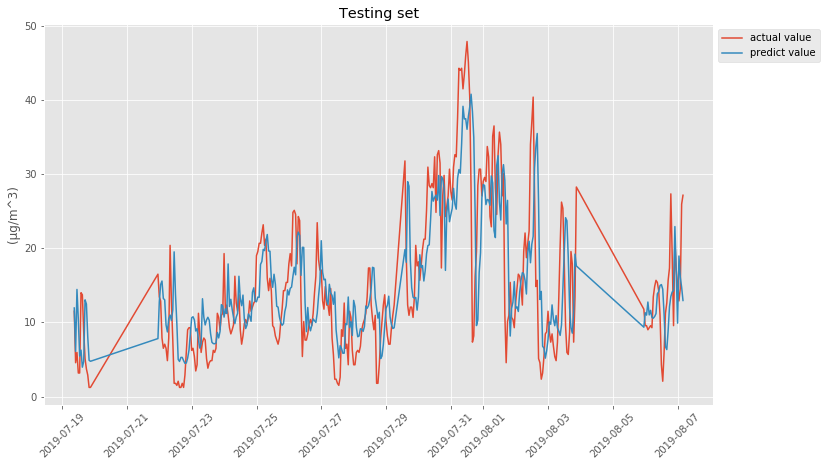

In [95]:
predict_next_n(pos=7, n=3)

Ë®òÈåÑÂêÑÂÄã‰ΩçÁΩÆÁöÑË™§Â∑Æ (8/6)

Èöî‰∏ÄÂÄãÂ∞èÊôÇÁöÑ

| Position  | 0    | 1    | 2    | 3    | 4    | 5    | 6    | 7    |
| --------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| Train     | 5.10 | 4.84 | 6.13 | 4.95 | 5.90 | 4.67 | 4.23 | 4.58 |
| Test      | 4.44 | 5.99 | 6.33 | 4.43 | 6.36 | 4.44 | 6.09 | 4.39 |

ÈöîÂÖ©ÂÄãÂ∞èÊôÇÁöÑ

| Position  | 0    | 1    | 2    | 3    | 4    | 5    | 6    | 7    |
| --------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| Train     | 7.26 | 6.88 | 7.59 | 7.00 | 7.95 | 6.83 | 6.07 | 6.66 |
| Test      | 6.03 | 8.68 | 9.01 | 6.13 | 8.89 | 6.17 | 8.56 | 6.24 |

Èöî‰∏âÂÄãÂ∞èÊôÇÁöÑ

| Position  | 0    | 1    | 2    | 3    | 4    | 5    | 6    | 7    |
| --------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| Train     | 8.38 | 8.03 | 8.64 | 8.16 | 9.00 | 8.15 | 7.38 | 7.91 |
| Test      | 6.71 | 8.98 | 10.11 | 6.99 | 10.11 | 7.16 | 9.32 | 7.01 |


## ‰∏çÂçÄÂàÜ Position ÁöÑ Linear Regression

Êú™ÂÆåÊàê...

### Load data


In [58]:
data = get_all_data()

In [59]:
df = pd.DataFrame(data)

### Data preprocessing

In [60]:
# rename the names of columns
df = df.rename(columns = {'pm10': 'pm1.0', 'pm25': 'pm2.5', 'pm100': 'pm10.0'})

In [61]:
df.head()

_cls                      date  humidity  pm1.0  \
0  models.data_model.PMData 2019-05-11 09:28:17+08:00        62     50   
1  models.data_model.PMData 2019-05-11 09:29:44+08:00        67     42   
2  models.data_model.PMData 2019-05-11 09:43:14+08:00        61     36   
3  models.data_model.PMData 2019-05-11 09:44:42+08:00        67     41   
4  models.data_model.PMData 2019-05-11 09:58:13+08:00        59     39   

   pm10.0  pm2.5  position  temp  
0      94     78         3    28  
1      81     72         5    27  
2      71     60         3    29  
3      82     70         5    27  
4      75     63         3    29

In [62]:
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
df['weekday'] = df['date'].apply(lambda x: x.weekday)
df['hour'] = df['date'].apply(lambda x: x.hour)
df['hour_minute'] = df['date'].apply(lambda x: x.hour+x.minute/60)

In [63]:
df.head()

_cls                      date  humidity  pm1.0  \
0  models.data_model.PMData 2019-05-11 09:28:17+08:00        62     50   
1  models.data_model.PMData 2019-05-11 09:29:44+08:00        67     42   
2  models.data_model.PMData 2019-05-11 09:43:14+08:00        61     36   
3  models.data_model.PMData 2019-05-11 09:44:42+08:00        67     41   
4  models.data_model.PMData 2019-05-11 09:58:13+08:00        59     39   

   pm10.0  pm2.5  position  temp  month  day  weekday  hour  hour_minute  
0      94     78         3    28      5   11        5     9     9.466667  
1      81     72         5    27      5   11        5     9     9.483333  
2      71     60         3    29      5   11        5     9     9.716667  
3      82     70         5    27      5   11        5     9     9.733333  
4      75     63         3    29      5   11        5     9     9.966667

In [64]:
df.drop(columns=['_cls', 'date'], inplace=True)
df.head()

humidity  pm1.0  pm10.0  pm2.5  position  temp  month  day  weekday  hour  \
0        62     50      94     78         3    28      5   11        5     9   
1        67     42      81     72         5    27      5   11        5     9   
2        61     36      71     60         3    29      5   11        5     9   
3        67     41      82     70         5    27      5   11        5     9   
4        59     39      75     63         3    29      5   11        5     9   

   hour_minute  
0     9.466667  
1     9.483333  
2     9.716667  
3     9.733333  
4     9.966667

In [65]:
df[['pm2.5_next']] = df[['pm2.5']].shift(-1)

In [66]:
df.dropna(inplace=True)
df.tail()

humidity  pm1.0  pm10.0  pm2.5  position  temp  month  day  weekday  \
50960        80     20      34     32         0    25      8    7        2   
50961        77     16      26     24         1    26      8    7        2   
50962        73     17      28     26         6    26      8    7        2   
50963        75     14      30     27         5    26      8    7        2   
50964        79     13      26     24         4    26      8    7        2   

       hour  hour_minute  pm2.5_next  
50960     4     4.233333        24.0  
50961     4     4.266667        26.0  
50962     4     4.283333        27.0  
50963     4     4.283333        24.0  
50964     4     4.300000        28.0

In [67]:
four_fifth_len = len(df)*0.8
four_fifth_len = int(four_fifth_len)

In [68]:
train_df = df[:four_fifth_len]
test_df = df[four_fifth_len:]

In [69]:
X = train_df[['month', 'day', 'hour', 'pm1.0', 'pm10.0', 'pm2.5', 'temp', 'humidity', 'position']]
y = train_df[['pm2.5_next']]

In [70]:
test_X = test_df[['month', 'day', 'hour', 'pm1.0', 'pm10.0', 'pm2.5', 'temp', 'humidity', 'position']]
test_y = test_df[['pm2.5_next']]